<a href="https://colab.research.google.com/github/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/dt_probiotics_data_champion_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DT Probiotics Data Champion Assignment

* LOOK INTO DATASET [Link](https://github.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/Task_Records.csv)

* Automated Dashboard with Streamlit [Link](https://github.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/Task_Records.csv)


******

# Step 1: Data Overview


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load CSV file (replace with the actual path to your CSV file)
url = 'https://raw.githubusercontent.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/main/Task_Records.csv'
df = pd.read_csv(url)



In [ ]:
# Step 1: Data Overview
print("Shape of the dataset:", df.shape)
print("First few records:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)



Shape of the dataset: (109, 4)
First few records:
       Company Name  Founded      Sector  Revenue
0         Acme Corp     1995  Technology  5000000
1          Beta Ltd     2000     Finance  7000000
2         Gamma Inc     2010  Healthcare  3000000
3        Delta Corp     2005      Energy  4000000
4  Zeta Enterprises     2012  Technology  6000000

Summary Statistics:
           Founded       Revenue
count   109.000000  1.090000e+02
mean   2005.422018  5.685183e+06
std       8.087821  2.433464e+06
min    1990.000000  2.000000e+06
25%    2000.000000  3.500000e+06
50%    2008.000000  5.255000e+06
75%    2012.000000  7.105000e+06
max    2015.000000  1.035000e+07

Missing Values:
Company Name    0
Founded         0
Sector          0
Revenue         0
dtype: int64

Data Types:
Company Name    object
Founded          int64
Sector          object
Revenue          int64
dtype: object


******

# Step 2: Data Cleaning


In [ ]:
# Step 2: Data Cleaning
## Handle missing values
df['Revenue'].fillna(df['Revenue'].median(), inplace=True)
df['Sector'].fillna(df['Sector'].mode()[0], inplace=True)

## Handle duplicates
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

## Ensure correct data types
df['Founded'] = df['Founded'].astype(int)




Duplicate Rows: 37


<ipython-input-34-8ccd8e011ef3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue'].fillna(df['Revenue'].median(), inplace=True)
<ipython-input-34-8ccd8e011ef3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

******

# Step 3: Univariate Analysis

1. Distribution plots for numerical columns
2. Count plot for categorical columns
3. Boxplot for numerical columns


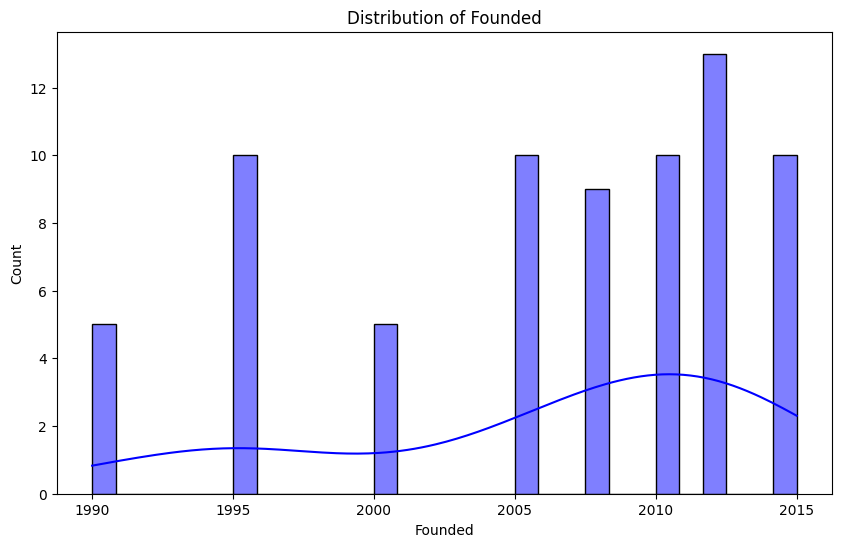

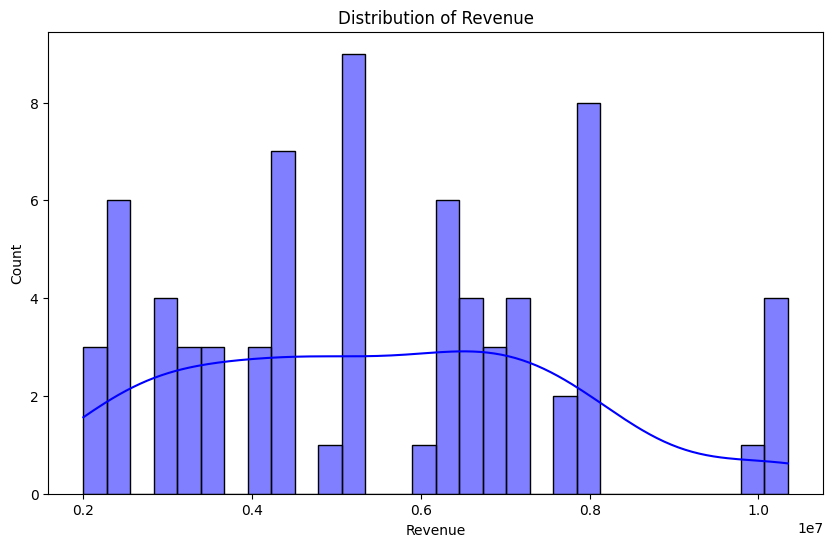

In [ ]:
# Step 3: Univariate Analysis
## Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

<ipython-input-37-b9245b718f89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


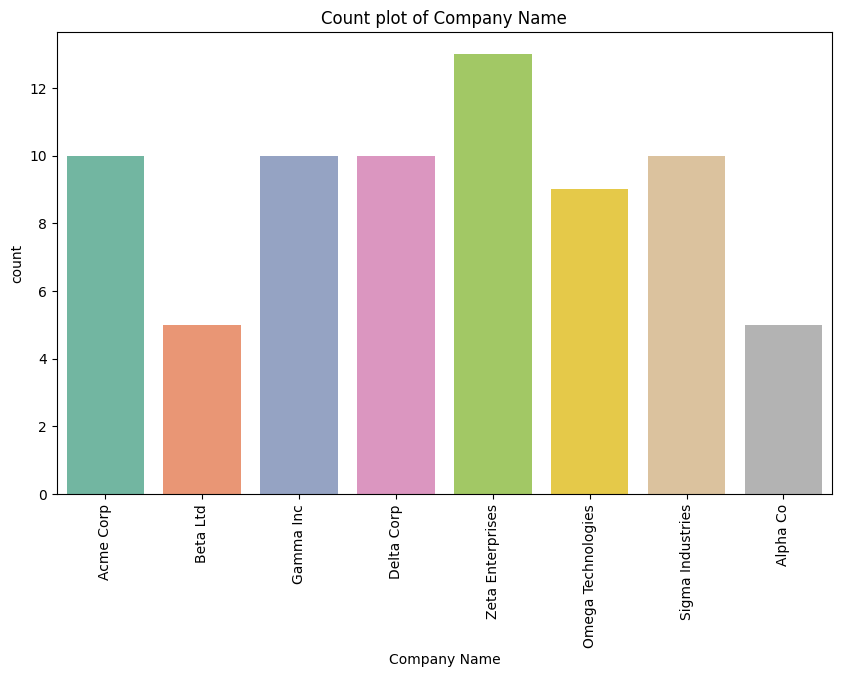

<ipython-input-37-b9245b718f89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


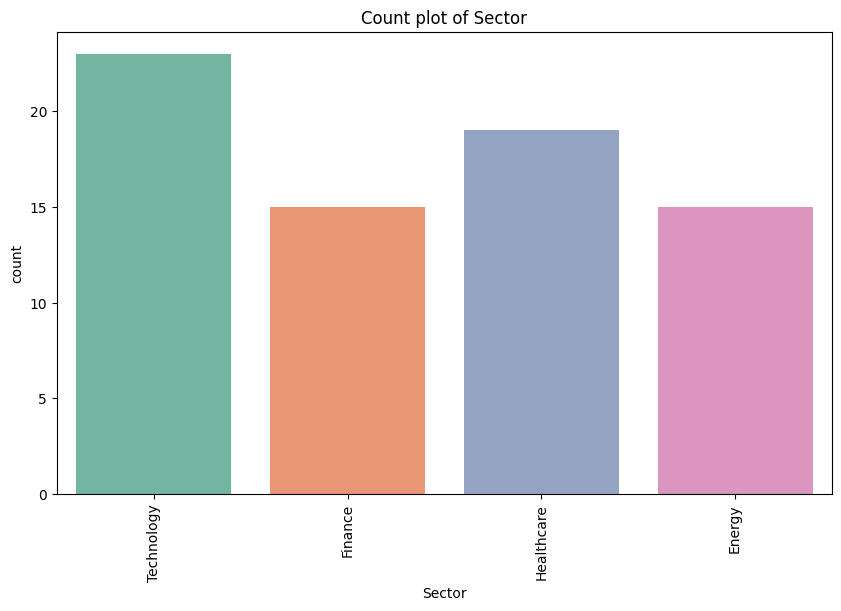

In [ ]:
## Count plot for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=90)
    plt.show()

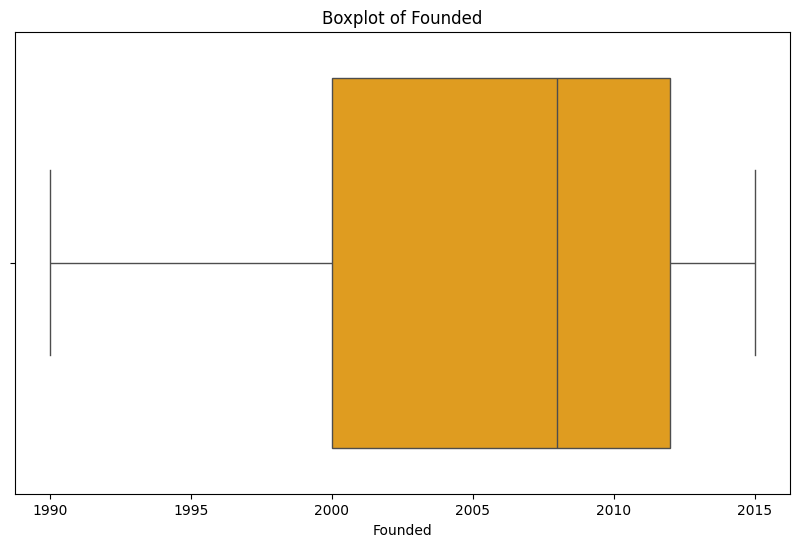

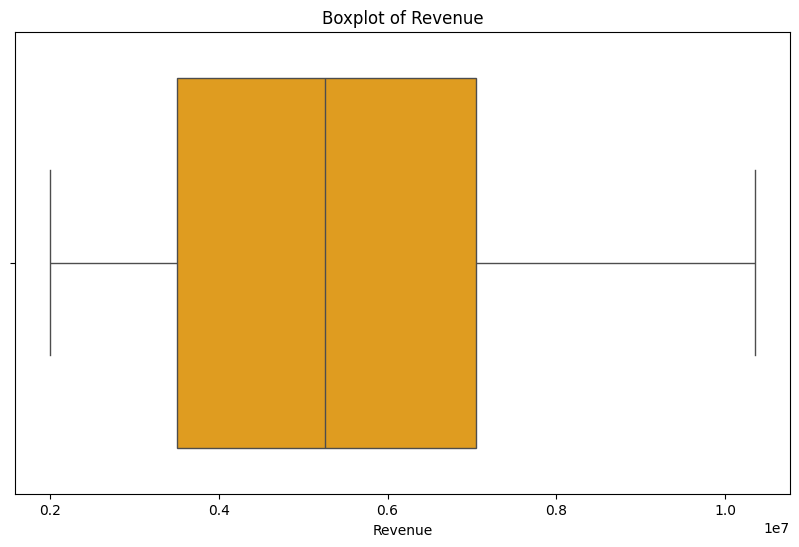

In [ ]:
## Boxplot for numerical columns (Outlier detection)
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

******

# Step 4: Bivariate Analysis

1. Correlation heatmap for numerical features
2. Pairplot for numerical features
3. Grouped analysis (Categorical vs Numerical)


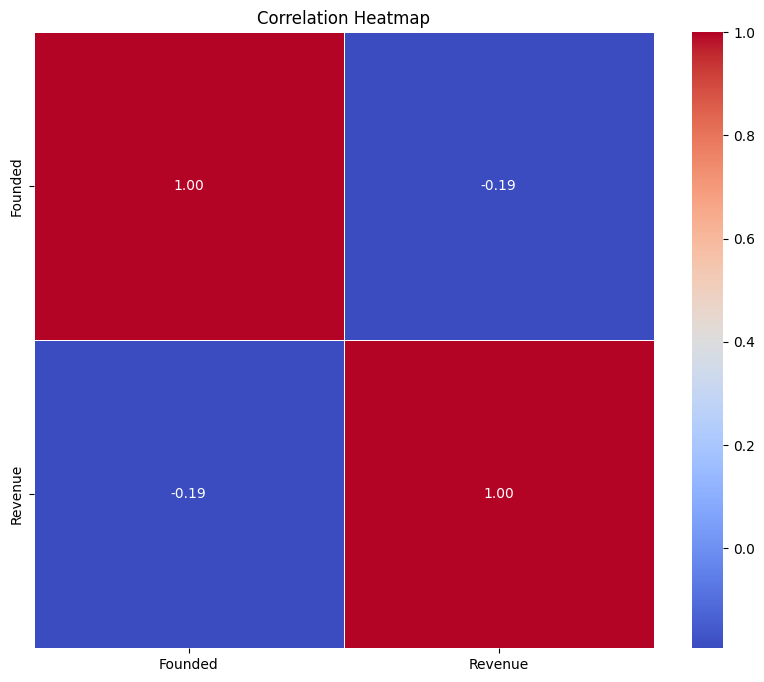

In [ ]:
# Step 4: Bivariate Analysis
## Correlation heatmap for numerical features
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

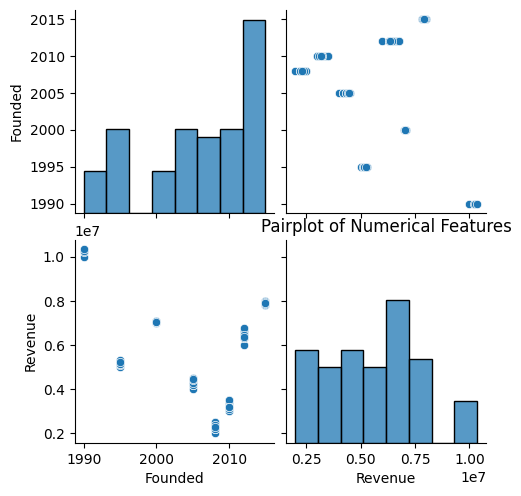

In [ ]:
## Pairplot for numerical features
sns.pairplot(df[numerical_cols])
plt.title("Pairplot of Numerical Features")
plt.show()

<ipython-input-42-8ec2d7e96613>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Revenue', data=df, palette='Set2')


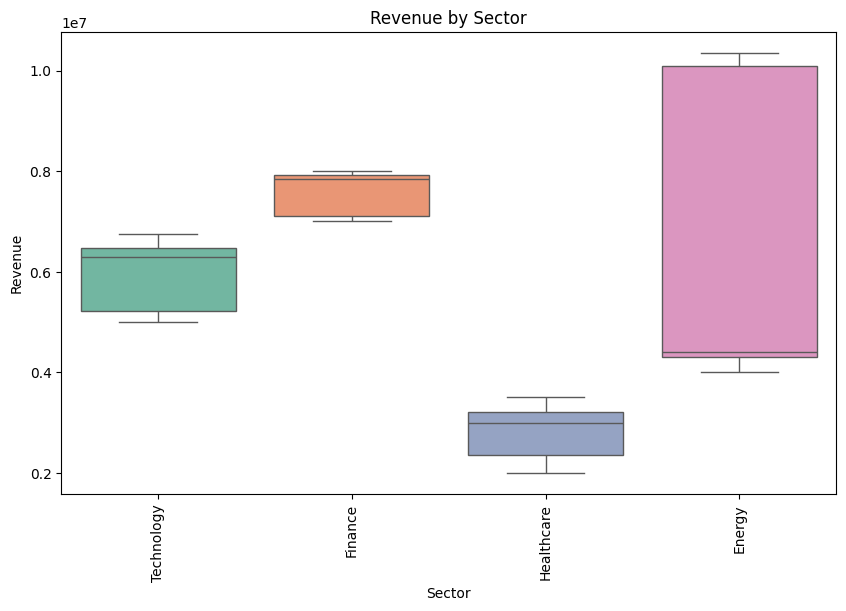

In [ ]:
## Grouped analysis (Categorical vs Numerical)
for col in categorical_cols:
    if col != 'Company Name':  # Skip non-informative categorical columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='Revenue', data=df, palette='Set2')
        plt.title(f"Revenue by {col}")
        plt.xticks(rotation=90)
        plt.show()

******

# Step 5: Feature Engineering


In [ ]:
# Step 5: Feature Engineering
## Z-Score for numerical features
df['Revenue_ZScore'] = zscore(df['Revenue'])

## Revenue per year
df['Revenue_Per_Year'] = df['Revenue'] / (2023 - df['Founded'])

# Categorizing revenue
conditions = [
    (df['Revenue'] < 5000000),
    (df['Revenue'] >= 5000000) & (df['Revenue'] < 10000000),
    (df['Revenue'] >= 10000000)
]
choices = ['Low', 'Medium', 'High']
df['Revenue_Category'] = np.select(conditions, choices, default='Medium')



******

# Step 6: Outlier detection


In [ ]:
# Step 6: Outlier detection
## Filter out outliers based on Z-scores
outliers = df[df['Revenue_ZScore'].abs() > 3]
print("\nOutliers Detected:\n", outliers)

## High revenue per year companies
high_revenue_per_year = df[df['Revenue_Per_Year'] > df['Revenue_Per_Year'].mean()]
print("\nCompanies with High Revenue Per Year:\n", high_revenue_per_year)

## Companies in the Technology sector
tech_companies = df[df['Sector'] == 'Technology']
print("\nCompanies in the Technology sector:\n", tech_companies)




Outliers Detected:
 Empty DataFrame
Columns: [Company Name, Founded, Sector, Revenue, Revenue_ZScore, Revenue_Per_Year, Revenue_Category]
Index: []

Companies with High Revenue Per Year:
          Company Name  Founded      Sector  Revenue  Revenue_ZScore  \
4    Zeta Enterprises     2012  Technology  6000000        0.214978   
6    Sigma Industries     2015     Finance  8000000        1.118168   
11   Zeta Enterprises     2012  Technology  6500000        0.440776   
15   Sigma Industries     2015     Finance  7800000        1.027849   
20   Zeta Enterprises     2012  Technology  6600000        0.485935   
21   Sigma Industries     2015     Finance  7900000        1.073009   
25   Zeta Enterprises     2012  Technology  6700000        0.531095   
31   Sigma Industries     2015     Finance  7850000        1.050429   
33   Zeta Enterprises     2012  Technology  6400000        0.395616   
37   Zeta Enterprises     2012  Technology  6750000        0.553674   
38   Sigma Industries     2015

******

# Step 7: K-Means Clustering


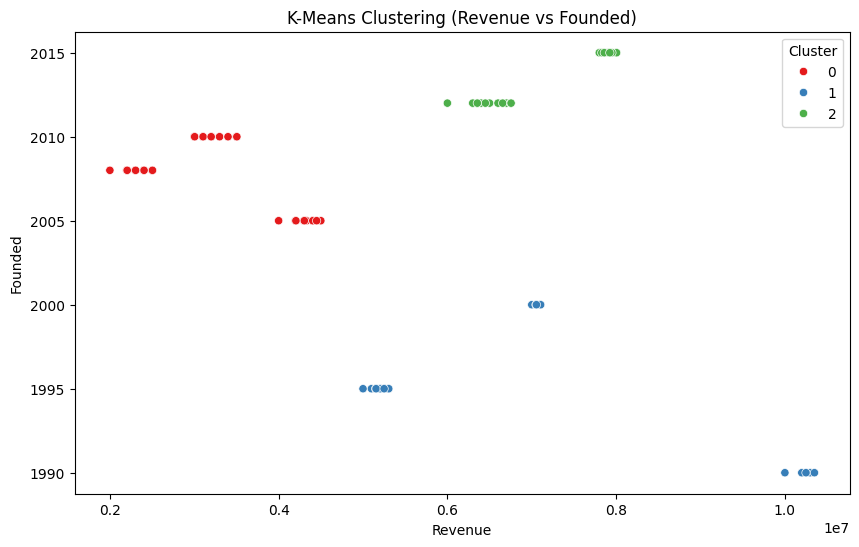

In [ ]:
# Step 7: Clustering Analysis (K-Means)
## Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Revenue', 'Founded']])

## KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Revenue'], y=df['Founded'], hue=df['Cluster'], palette='Set1')
plt.title("K-Means Clustering (Revenue vs Founded)")
plt.show()



******

# Step 8: Prediction Modeling (Random Forest Classifier)

In [ ]:
# Step 8: Prediction Modeling (Random Forest Classifier)
## Prepare the data
X = df[['Revenue', 'Founded', 'Revenue_Per_Year']]  # Features
y = df['Revenue_Category']  # Target

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

## Predictions and evaluation
y_pred = rf_model.predict(X_test)

print("\nRandom Forest Classifier - Evaluation:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))





Random Forest Classifier - Evaluation:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[ 1  0  0]
 [ 0  4  0]
 [ 0  0 10]]


******

# Step 9: Save Final Outputs

In [ ]:
# Step 9: Save Final Outputs
## Save the DataFrame with new features and clusters
df.to_csv("Final_Outputs.csv", index=False)

## Save the Random Forest Model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

# Step 10: Documentation and Insights
print("\nKey Insights and Documentation:")
print("1. Companies with higher revenue per year tend to have more established operations.")
print("2. The Technology sector shows a higher concentration of companies with 'High' revenue.")
print("3. Outliers in revenue were detected, particularly in the higher revenue range.")
print("4. Clustering analysis identified groups of companies with distinct revenue and founding year characteristics.")
print("5. The Random Forest model performed well in classifying revenue categories based on company characteristics.")



Key Insights and Documentation:
1. Companies with higher revenue per year tend to have more established operations.
2. The Technology sector shows a higher concentration of companies with 'High' revenue.
3. Outliers in revenue were detected, particularly in the higher revenue range.
4. Clustering analysis identified groups of companies with distinct revenue and founding year characteristics.
5. The Random Forest model performed well in classifying revenue categories based on company characteristics.
